**FALLBACK PARA O MATPLOTLIB**

In [6]:
# fallback pro matplotlib
# 1) Criar o alias que o matplotlib-inline 0.2.x espera
import matplotlib, sys, importlib
if not hasattr(matplotlib.rcParams, "_get"):
    matplotlib.rcParams._get = matplotlib.rcParams.__getitem__

# 2) Se o backend_inline já tiver sido importado e falhado, recarregue
if "matplotlib_inline.backend_inline" in sys.modules:
    importlib.reload(sys.modules["matplotlib_inline.backend_inline"])

# 3) Agora é seguro importar o pyplot
import matplotlib.pyplot as plt
# fim do fallback

# Presa-Predador - Lotka Volterra

População de predadores: canídeos

População de presas: aves ou roedores

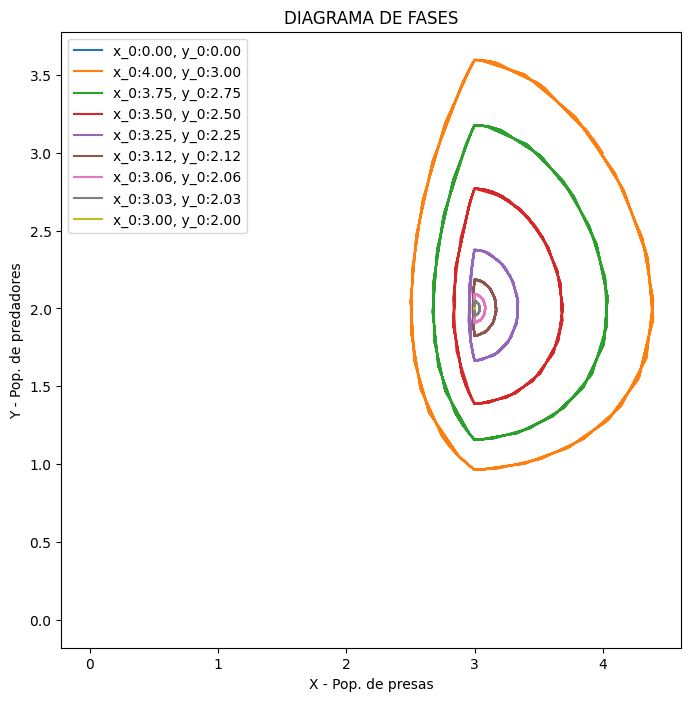

In [7]:
import numpy as np
from scipy.integrate import solve_ivp

as_fun = lambda p: p if callable(p) else lambda t, x, y: float(p)
a0 = 3
b0 = 1.5
c0 = 4.5
d0 = 1.5
invariante = False

a = lambda t, x, y : a0/2 + (a0/2) * (1 - np.exp(-0.05*x))
b = lambda t, x, y : b0 * a(t, x, y) / a0
c = lambda t, x, y: c0 if x > c0/d0 else 1.2 * c0
d = lambda t, x, y: d0 * c0 / c(t, x, y)

# para mapear constentes para funções, se for o caso
a, b, c, d = map(
    as_fun, [a, b, c, d] if not invariante else [a0, b0, c0, d0]
)

def sistema_edo(t, z):
    x, y = z
    return [
        a(t, x, y) * x - b(t, x, y) * x * y, # = dx/dt
       -c(t, x, y) * y + d(t, x, y) * x * y  # = dy/dt
    ]

def integrate(
    fn : callable,
    t0,
    tf,
    x0,
    y0
):
    y0_ivp = [x0, y0]
    sol = solve_ivp(
        fn,
        (t0, tf),
        y0_ivp,
        method = 'RK45',
        rtol = 1e-6,
        atol = 1e-9,
        dense_output = True
    )
    return sol.t, *sol.y

x_0_array = np.array(
    [0, c0/d0 + 1, c0/d0 + 0.75, c0/d0 + 0.5, c0/d0 + 0.25, c0/d0 + 0.125, c0/d0 + 0.0625, c0/d0 + 0.03125, c0/d0 + 1/1024]
)
y_0_array = np.array(
    [0, a0/b0 + 1, a0/d0 + 0.75, a0/b0 + 0.5, a0/b0 + 0.25, a0/b0 + 0.125, a0/b0 + 0.0625, a0/b0 + 0.03125, a0/b0 + 1/1024]
)

plt.figure(figsize = (8, 8))
plt.title('DIAGRAMA DE FASES')
plt.xlabel('X - Pop. de presas')
plt.ylabel('Y - Pop. de predadores')
t_final = 10
for x_0, y_0 in zip(x_0_array, y_0_array):
    t, x, y = integrate(sistema_edo, 0, t_final, x_0, y_0)
    plt.plot(x, y, label = f'x_0:{x_0:.2f}, y_0:{y_0:.2f}')
plt.legend()
plt.show()

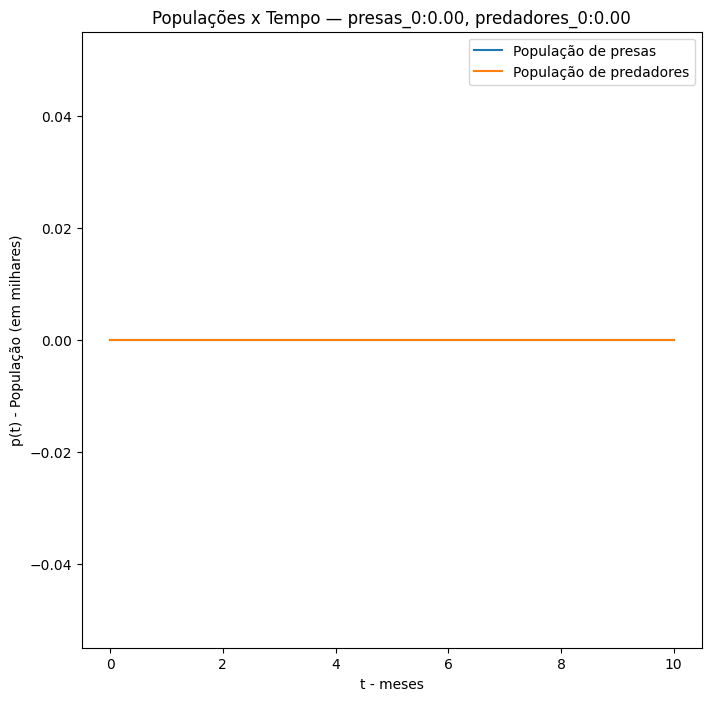

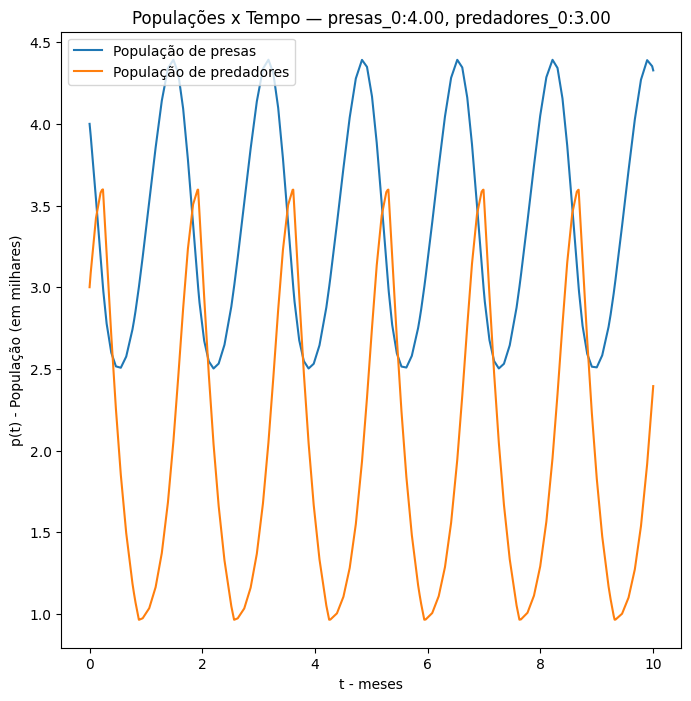

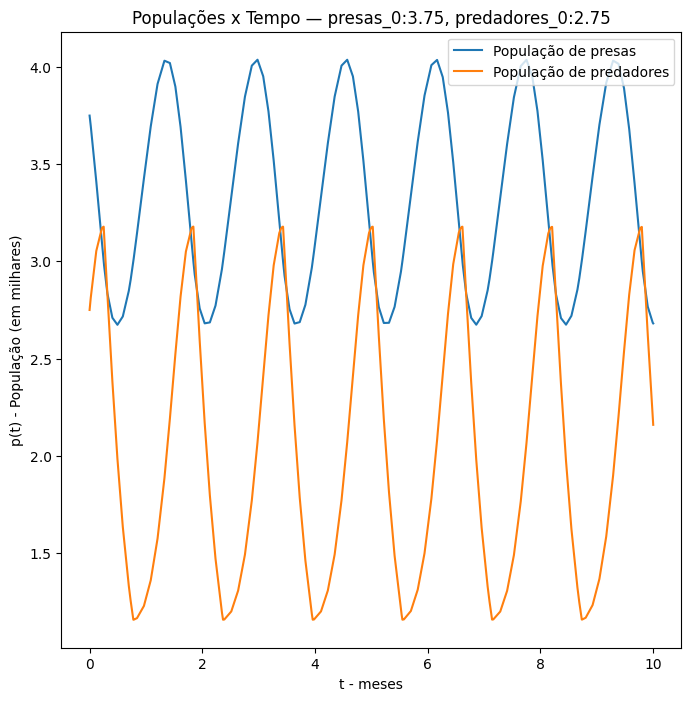

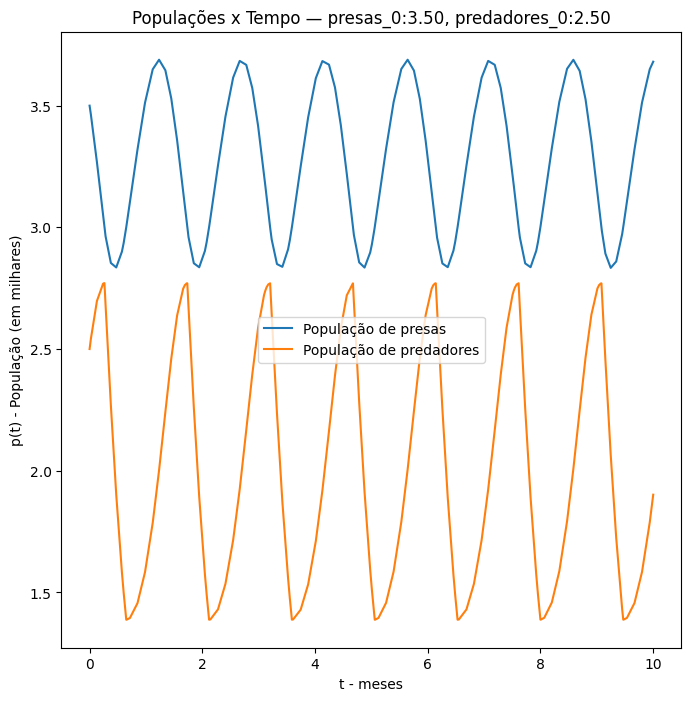

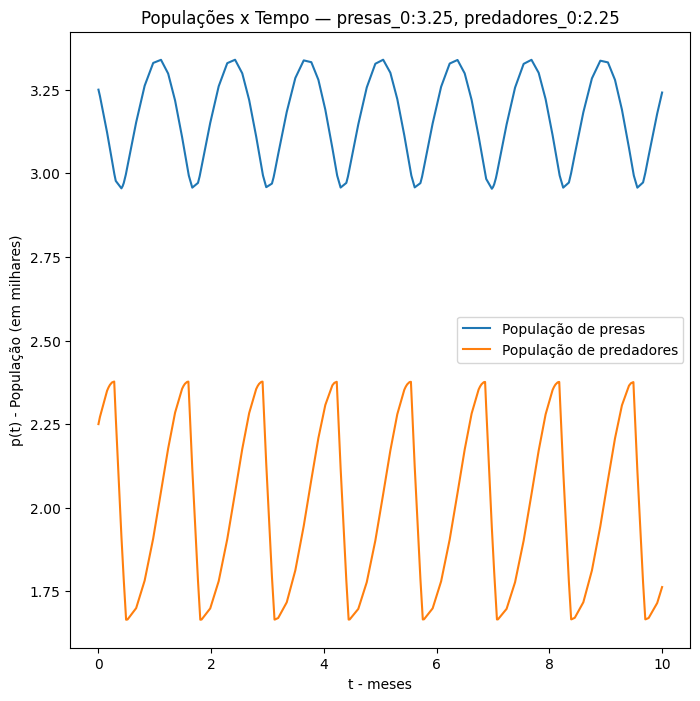

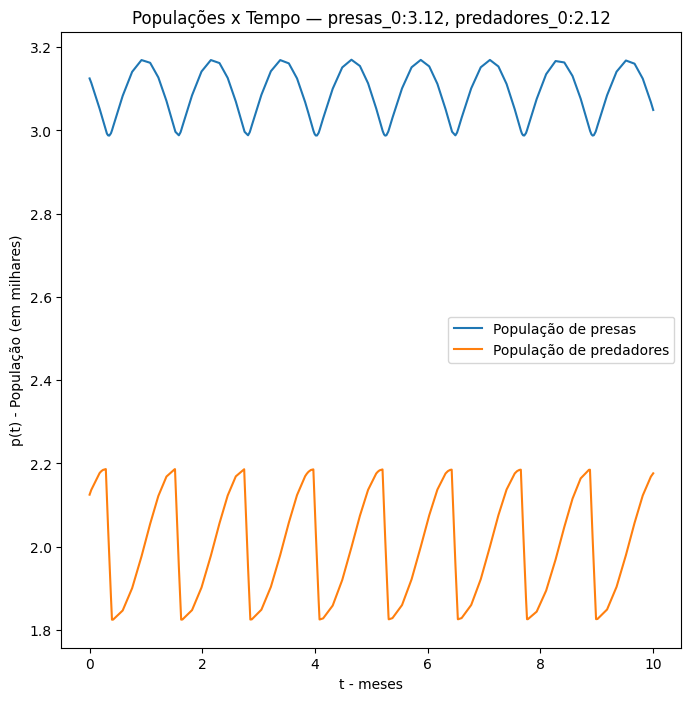

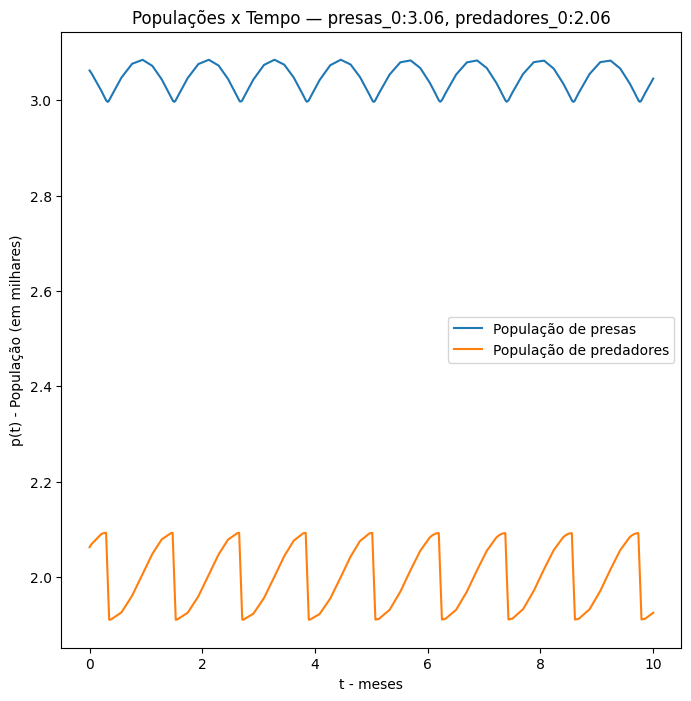

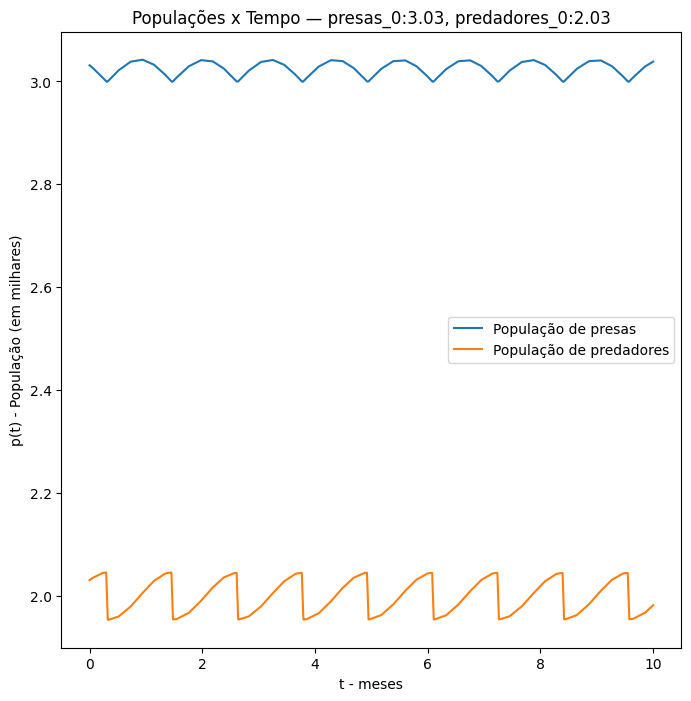

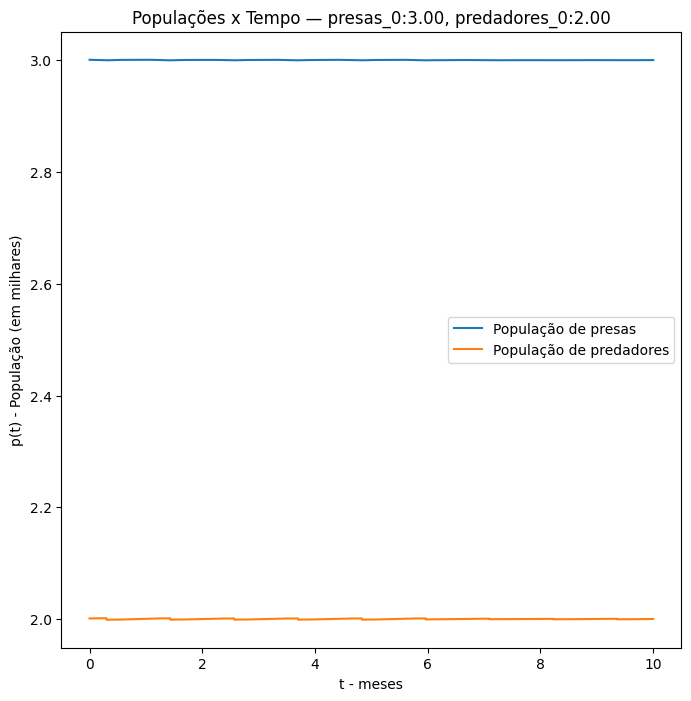

In [8]:
t_final = 10
for x_0, y_0 in zip(x_0_array, y_0_array):
    plt.figure(figsize = (8, 8))
    plt.title(f'Populações x Tempo — presas_0:{x_0:.2f}, predadores_0:{y_0:.2f}')
    plt.xlabel('t - meses')
    plt.ylabel('p(t) - População (em milhares)')
    t, x, y = integrate(sistema_edo, 0, t_final, x_0, y_0)
    plt.plot(t, x, label = f'População de presas')
    plt.plot(t, y, label = f'População de predadores')
    plt.legend()
    plt.show()

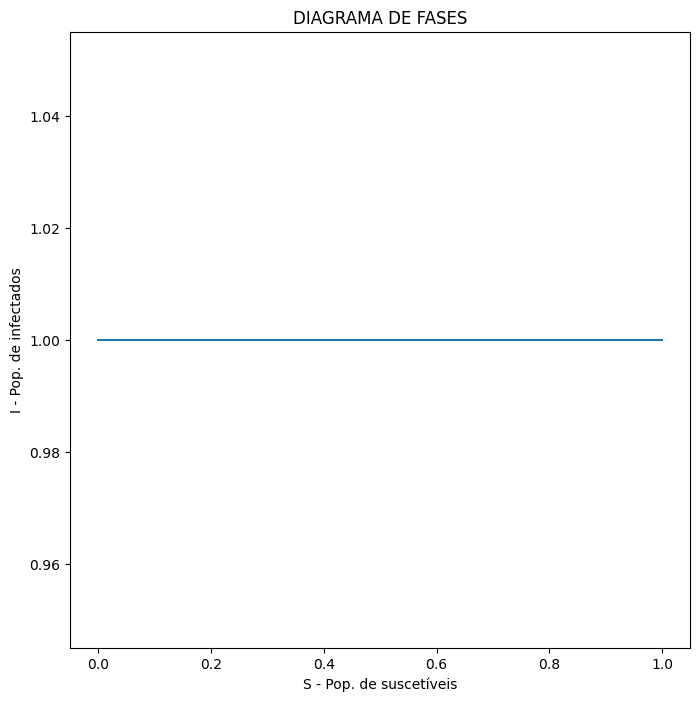

In [5]:


import numpy as np
plt.figure(figsize = (8, 8))
plt.title('DIAGRAMA DE FASES')
plt.xlabel('S - Pop. de suscetíveis')
plt.ylabel('I - Pop. de infectados')
plt.plot(np.linspace(0, 1, 6), )
plt.show()